## Classificazione SVM con Eigenfaces

Questo notebook implementa un sistema di riconoscimento facciale utilizzando tecniche di machine learning. Le principali funzionalità includono:

1. **Caricamento e Pre-elaborazione dei Dati**:  
   Utilizza il dataset "Labeled Faces in the Wild" (LFW), che contiene immagini di volti etichettati. Le immagini vengono ridimensionate e appiattite per essere utilizzate come input per i modelli.

2. **Riduzione della Dimensionalità con PCA**:  
   Applica l'Analisi delle Componenti Principali (PCA) per ridurre la dimensionalità delle immagini, estraendo le caratteristiche principali dei volti (note come "eigenfaces"). Questo riduce la complessità computazionale mantenendo le informazioni più rilevanti.

3. **Classificazione con SVM**:  
   Addestra un classificatore SVM (Support Vector Machine) per distinguere tra i volti delle diverse persone nel dataset. La ricerca a griglia (GridSearchCV) viene utilizzata per ottimizzare gli iperparametri del modello.

4. **Visualizzazione dei Risultati**:  
   Include funzioni per visualizzare le immagini originali, le "eigenfaces" e i risultati della classificazione, mostrando le previsioni del modello e confrontandole con le etichette reali.

5. **Valutazione del Modello**:  
   Calcola metriche di performance come accuratezza e matrice di confusione per valutare l'efficacia del modello sia sul set di addestramento che su quello di test.



Operazioni preliminari

- **Disattivare i warning**: Per rendere l'output del notebook più pulito e leggibile.
- **Visualizzare i grafici inline**: Per facilitare l'analisi dei risultati direttamente nel notebook, senza dover aprire finestre esterne.

1. **`import warnings`**:
   - Importa il modulo `warnings`, che consente di gestire i messaggi di avviso (warnings) generati dal codice Python.

2. **`warnings.filterwarnings('ignore')`**:
   - Disattiva tutti i messaggi di avviso. Questo è utile per evitare che i warning "inquinino" l'output del notebook, specialmente quando non sono rilevanti per l'analisi o la visualizzazione.

3. **`%matplotlib inline`**:
   - È una *magic command* specifica di Jupyter Notebook.
   - Serve per visualizzare i grafici generati da `matplotlib` direttamente all'interno del notebook, invece di aprirli in una finestra separata.

In [14]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Importazione di tutte le librerie e i moduli necessari:

- `numpy` viene importato come `np` per la manipolazione efficiente di array numerici, fondamentale per l'elaborazione delle immagini.
- `imshow` da `skimage.io` serve per visualizzare immagini direttamente nei notebook o nelle finestre grafiche.
- `time` viene usato per misurare la durata delle operazioni, utile per valutare le prestazioni.
- `logging` permette di gestire messaggi di log, facilitando il debug e il monitoraggio del flusso del programma.
- `matplotlib.pyplot` come `plt` è una libreria standard per la visualizzazione di dati e immagini in Python.

Per quanto riguarda la parte di machine learning:
- `train_test_split` da `sklearn.model_selection` suddivide i dati in set di addestramento e test.
- `GridSearchCV` consente di ottimizzare gli iperparametri di un modello tramite ricerca su griglia.
- `classification_report` e `accuracy_score` da `sklearn.metrics` forniscono metriche per valutare le prestazioni del classificatore.
- `confusion_matrix` aiuta a visualizzare gli errori di classificazione.
- `PCA` da `sklearn.decomposition` implementa l'Analisi delle Componenti Principali, fondamentale per ridurre la dimensionalità delle immagini dei volti.
- `SVC` da `sklearn.svm` è un classificatore a vettori di supporto, spesso usato per il riconoscimento facciale.
- `fetch_lfw_people` da `sklearn.datasets` permette di caricare il dataset "Labeled Faces in the Wild", una raccolta di immagini di volti comunemente usata per testare algoritmi di riconoscimento facciale.

In [10]:
import numpy as np
from skimage.io import imshow
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people

##### **Definizione stile per grafica**
- **Uniformità visiva:** Configura uno stile coerente per tutti i grafici generati nel notebook.
- **Personalizzazione:** Permette di utilizzare una palette di colori personalizzata e una colormap specifica per migliorare la leggibilità e l'estetica delle visualizzazioni.
- **Facilità di interpretazione:** Le impostazioni predefinite (come il font e le dimensioni delle figure) rendono i grafici più chiari e leggibili.

1. **Importazioni:**
   - `matplotlib.pyplot` (`plt`): Modulo per creare grafici e visualizzazioni.
   - `matplotlib.colors` (`mcolors`): Modulo per gestire colori e creare colormap personalizzate.

2. **Impostazione dello stile di plotting:**
   - `plt.style.use('fivethirtyeight')`: Imposta lo stile dei grafici al tema "fivethirtyeight", che offre un design moderno e leggibile.

3. **Configurazione dei parametri di visualizzazione:**
   - `plt.rcParams`: Dizionario che consente di configurare vari aspetti dei grafici, come:
     - **Font e dimensioni:** Specifica il tipo di carattere (`sans-serif`, `Ubuntu`) e le dimensioni per titoli, etichette e legende.
     - **Colori e interpolazione:** Imposta la mappa dei colori predefinita (`jet`) e disabilita l'interpolazione delle immagini (`none`).
     - **Dimensioni delle figure:** Imposta la dimensione predefinita delle figure a `(16, 8)`.
     - **Linee e marker:** Configura lo spessore delle linee e la dimensione dei marker.

4. **Definizione di una palette di colori personalizzata:**
   - `colors`: Lista di colori esadecimali che possono essere utilizzati per personalizzare i grafici.

5. **Creazione di una colormap personalizzata:**
   - `mcolors.LinearSegmentedColormap.from_list`: Crea una colormap lineare utilizzando un sottoinsieme dei colori definiti nella lista `colors`.

In [32]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

La funzione `plot_gallery`, serve per visualizzare una galleria di immagini in una griglia. I parametri principali sono:

- `images`: una lista o array di immagini, dove ogni immagine è rappresentata come un array monodimensionale (flattened).
- `h` e `w`: altezza e larghezza di ciascuna immagine, necessari per rimodellare ogni array monodimensionale nella sua forma originale bidimensionale.
- `n_row` e `n_col`: specificano il numero di righe e colonne della griglia (default 3x4).
- `titles`: opzionale, una lista di titoli da mostrare sopra ogni immagine.

La funzione crea una figura di dimensioni proporzionali al numero di immagini da mostrare. Usa un ciclo per posizionare ogni immagine in una sottotrama (`subplot`) della griglia, rimodellando ogni immagine con `reshape((h, w))` e visualizzandola in scala di grigi. Se viene fornita la lista dei titoli, aggiunge il titolo corrispondente sopra ogni immagine. Infine, rimuove i tick dagli assi per rendere la visualizzazione più pulita.

L’uso di `plt.cm.gray` garantisce che le immagini siano mostrate in scala di grigi, adatto per immagini come i volti.

In [33]:
def plot_gallery(images, h, w, n_row=3, n_col=4, titles=None):
    """
    Visualizza una galleria di immagini in una griglia.

    Parametri
    ----------
    images : array-like, shape (n_images, h*w)
        Lista o array di immagini flattenate (monodimensionali).
    h : int
        Altezza di ciascuna immagine.
    w : int
        Larghezza di ciascuna immagine.
    n_row : int, opzionale (default=3)
        Numero di righe della griglia.
    n_col : int, opzionale (default=4)
        Numero di colonne della griglia.
    titles : list di str, opzionale
        Titoli da mostrare sopra ogni immagine.

    Note
    ----
    Le immagini sono mostrate in scala di grigi. Se forniti, i titoli sono visualizzati sopra le immagini.
    """
    # Crea una figura con dimensioni proporzionali al numero di righe e colonne
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    # Aggiusta i margini e lo spazio tra le immagini
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    # Cicla su tutte le immagini da mostrare
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)  # Crea il subplot per ogni immagine
        # Mostra l'immagine rimodellata nella forma originale
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        # Se forniti, aggiungi il titolo sopra l'immagine
        if titles is not None:
            plt.title(titles[i], size=12)
        # Rimuovi i tick dagli assi per una visualizzazione più pulita
        plt.xticks(())
        plt.yticks(())

Uso della funzione fetch_lfw_people per caricare un dataset di immagini di volti umani, noto come "Labeled Faces in the Wild" (LFW). Questo dataset è spesso usato per esercizi di riconoscimento facciale e machine learning.

L'argomento min_faces_per_person=70 indica che verranno incluse solo le persone che hanno almeno 70 immagini nel dataset, riducendo così la complessità e concentrandosi su individui con un numero sufficiente di esempi. L'opzione resize=0.8 ridimensiona ogni immagine all'80% della sua dimensione originale, il che aiuta a ridurre la quantità di dati da elaborare e velocizza i calcoli successivi.

Il risultato, lfw_people, è un oggetto simile a un dizionario che contiene le immagini, le etichette delle persone e altre informazioni utili per l'analisi e l'addestramento di modelli di riconoscimento facciale.

In [34]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.8)

Estrazione di tre valori dalla proprietà shape dell’array lfw_people.images. In particolare, lfw_people.images è un array NumPy che contiene le immagini del dataset.

La proprietà shape restituisce una tupla che rappresenta le dimensioni dell’array. Nel caso delle immagini, questa tupla ha tre valori: il numero totale di immagini (n_samples), l’altezza di ciascuna immagine in pixel (h) e la larghezza di ciascuna immagine in pixel (w). Assegnando questi valori a n_samples, h e w, il codice rende più semplice lavorare con le dimensioni delle immagini nei passaggi successivi, ad esempio per visualizzarle o per riorganizzare i dati per l’addestramento di un modello di machine learning.

In [35]:
n_samples, h, w = lfw_people.images.shape

Assegnazione alla variabile `X` dei dati contenuti nell'attributo `.data` dell'oggetto `lfw_people`.

L'attributo `.data` contiene le immagini già "appiattite" (flattened), cioè ogni immagine bidimensionale (ad esempio 62x47 pixel) viene convertita in un vettore monodimensionale. Quindi, `X` sarà una matrice NumPy dove ogni riga rappresenta un'immagine e ogni colonna rappresenta un pixel dell'immagine originale.

In [36]:
X = lfw_people.data

Nel contesto considerato, `X` rappresenta una matrice in cui ogni riga corrisponde a un’immagine (ad esempio, una faccia) appiattita in un vettore, e ogni colonna rappresenta un pixel o una caratteristica. Quindi, `X.shape` potrebbe restituisce una coppia di valori `(n_immagini, n_pixel)`, dove `n_immagini` è il numero totale di immagini e `n_pixel` il numero di pixel per immagine.

- `n_features = X.shape[1]`: `n_features` indica quindi il numero totale di features (pixel) per ogni immagine.

- `y = lfw_people.target`: assegnazione a `y` dei valori target, ovvero le etichette che indicano a quale persona appartiene ciascuna immagine. Queste etichette sono tipicamente numeriche.

- `target_names = lfw_people.target_names`: estrazione dei nomi reali associati alle etichette numeriche, permettendo di tradurre un'etichetta come "3" nel nome della persona corrispondente.

- `n_classes = target_names.shape[0]`: calcolo del numero totale di classi distinte (cioè il numero di persone diverse presenti nel dataset) contando quanti nomi diversi ci sono in `target_names`.


In [37]:
# Numero di feature (pixel per immagine)
n_features = X.shape[1]

# Etichette numeriche delle persone (target)
y = lfw_people.target

# Nomi delle persone corrispondenti alle etichette
target_names = lfw_people.target_names

# Numero di classi distinte (persone diverse)
n_classes = target_names.shape[0]

Stampa dei valori calcolati

In [38]:
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")
print(target_names)

n_samples: 1288
n_features: 7500
n_classes: 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


La funzione `plot_gallery` viene chiamata, passando come argomenti `X`, `h`, `w`, e specificando che la galleria deve essere composta da 6 righe (`n_row=6`) e 8 colonne (`n_col=8`). 

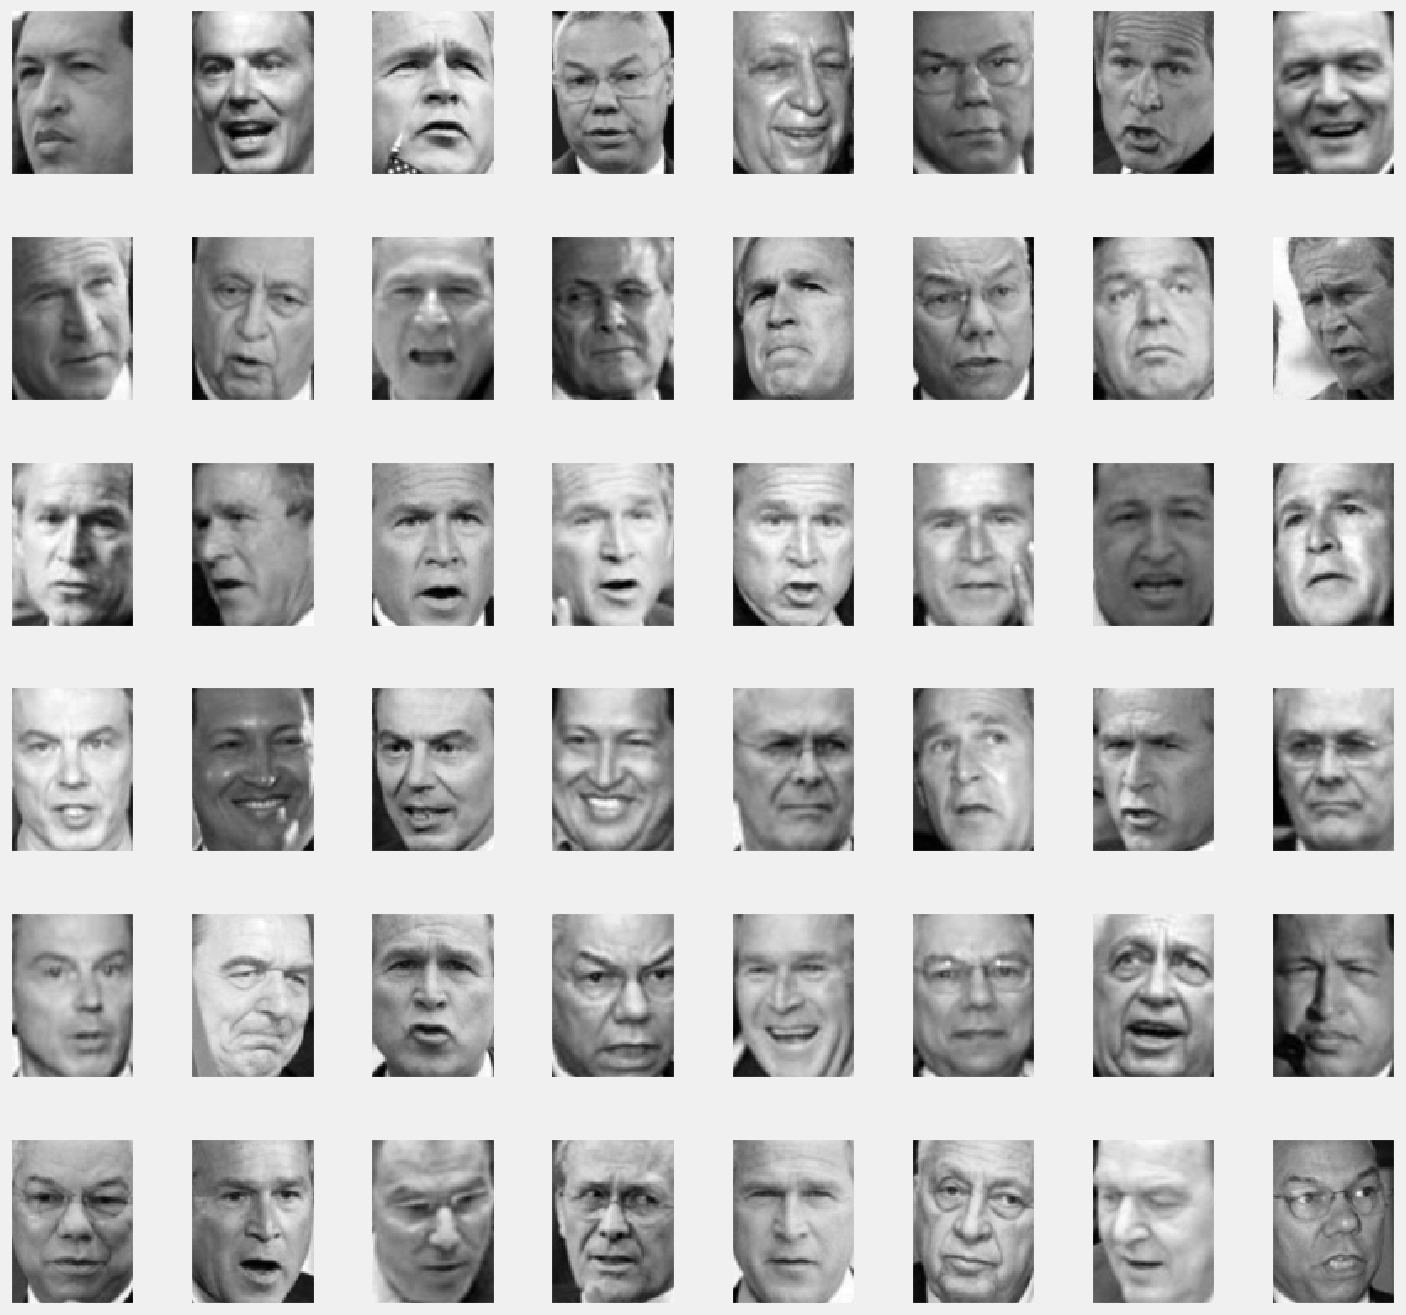

In [39]:
plot_gallery(X, h, w, n_row=6, n_col=8)

Uso della funzione `train_test_split` per suddividere il dataset `X` (contenente i dati delle immagini) e le relative etichette `y` in due insiemi distinti: uno per l’addestramento (`X_train`, `y_train`) e uno per il test (`X_test`, `y_test`). Questo è un passaggio fondamentale nell’apprendimento automatico, perché permette di valutare le prestazioni del modello su dati che non ha mai visto durante l’addestramento, riducendo il rischio di overfitting.

Dopo la suddivisione, vengono stampate le dimensioni di `X_train` e `X_test` usando il metodo `.shape`. Questo aiuta a verificare che la divisione sia avvenuta correttamente e a capire quanti campioni sono stati assegnati a ciascun insieme. In assenza di parametri aggiuntivi, `train_test_split` divide i dati in modo casuale, assegnando il 75% dei dati all’addestramento e il 25% al test (valori predefiniti). Se vuoi controllare la proporzione o la casualità della suddivisione, puoi specificare i parametri `test_size` e `random_state`.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)

X_train: (966, 7500)
X_test: (322, 7500)


Visualizzazione di un'immagine specifica dal dataset di addestramento, utilizzando la libreria Matplotlib.

- `i = 650`: seleziona l'indice dell'immagine che si vuole visualizzare. In questo caso, l'immagine numero 650 del dataset di addestramento.
- `plt.figure(figsize=(4,4))`: crea una nuova figura di dimensioni 4x4 pollici, utile per controllare la dimensione della finestra di visualizzazione.
- `plt.imshow(X_train[i, :].reshape((h, w)), interpolation='nearest', cmap=plt.cm.gray)`: mostra l'immagine selezionata. L'immagine viene estratta dal dataset `X_train`, che probabilmente contiene le immagini in formato vettoriale (una riga per immagine). Il metodo `reshape((h, w))` trasforma il vettore in una matrice bidimensionale con altezza `h` e larghezza `w`, ricostruendo così l'immagine originale. L'opzione `cmap=plt.cm.gray` visualizza l'immagine in scala di grigi.
- `plt.xticks(())` e `plt.yticks(())`: rimuovono le etichette degli assi x e y per rendere la visualizzazione più pulita.
- `plt.title(target_names[y[i]])`: imposta il titolo della figura con il nome della persona corrispondente all'immagine, utilizzando l'array `target_names` e l'etichetta `y[i]`.
- `plt.show()`: visualizza effettivamente la figura.

In sintesi, questo codice serve per ispezionare visivamente una specifica immagine del dataset, mostrando anche il nome della persona rappresentata, utile per verificare la correttezza dei dati o per esplorare il dataset.

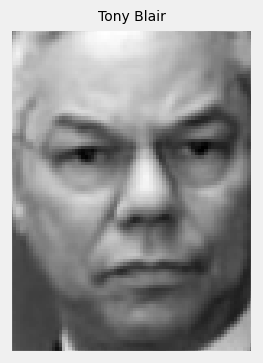

In [41]:
# Seleziona l'indice dell'immagine da visualizzare
i = 650

# Crea una nuova figura di dimensioni 4x4 pollici
plt.figure(figsize=(4,4))

# Visualizza l'immagine selezionata dal training set, rimodellandola alla forma originale
plt.imshow(X_train[i, :].reshape((h, w)), interpolation='nearest', cmap=plt.cm.gray)

# Rimuove le etichette degli assi per una visualizzazione più pulita
plt.xticks(())
plt.yticks(())

# Imposta il titolo con il nome della persona corrispondente all'immagine
plt.title(target_names[y[i]])

# Mostra la figura
plt.show()

Calcola PCA sul training set per estrarre le cosiddette "eigenfaces" da un insieme di immagini di volti.

- La variabile `n_components` indica che vogliamo ridurre la dimensionalità dei dati al numero specificato di componenti principali. In altre parole, cerchiamo di rappresentare ogni immagine come una combinazione lineare di 150 "volti base" (eigenfaces).
- L'oggetto `pca` viene creato usando la classe `PCA` di scikit-learn. L'argomento `svd_solver='randomized'` rende il calcolo più veloce per dataset di grandi dimensioni, mentre `whiten=True` normalizza le componenti principali per avere varianza unitaria, il che può migliorare le prestazioni di alcuni algoritmi di machine learning successivi.
- Il metodo `.fit(X_train)` adatta la PCA ai dati di addestramento, trovando le direzioni principali di variazione nelle immagini.
- Infine, `pca.components_` contiene i vettori delle componenti principali trovate dalla PCA. Questi vettori vengono rimodellati (`reshape`) per avere la stessa forma delle immagini originali (`(n_components, h, w)`), ottenendo così le "eigenfaces": immagini che rappresentano le caratteristiche fondamentali dei volti nel dataset.

In [65]:
# Numero di componenti principali da estrarre (eigenfaces)
n_components = 50

# Crea e adatta la PCA sui dati di training
# - n_components: numero di componenti principali da mantenere
# - svd_solver='randomized': metodo più veloce per dataset grandi
# - whiten=True: normalizza le componenti principali
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# Estrae le componenti principali (eigenfaces) e le rimodella nella forma delle immagini originali
eigenfaces = pca.components_.reshape((n_components, h, w))

In [66]:
eigenfaces.shape

(50, 100, 75)

Creazione di una griglia di sottoplot (subplots) utilizzando Matplotlib per visualizzare una insieme di componeti (autovettori) derivati dall'applicazione della PCA, riportate mediante reshape sotto forma di immagini chiamate "eigenfaces".

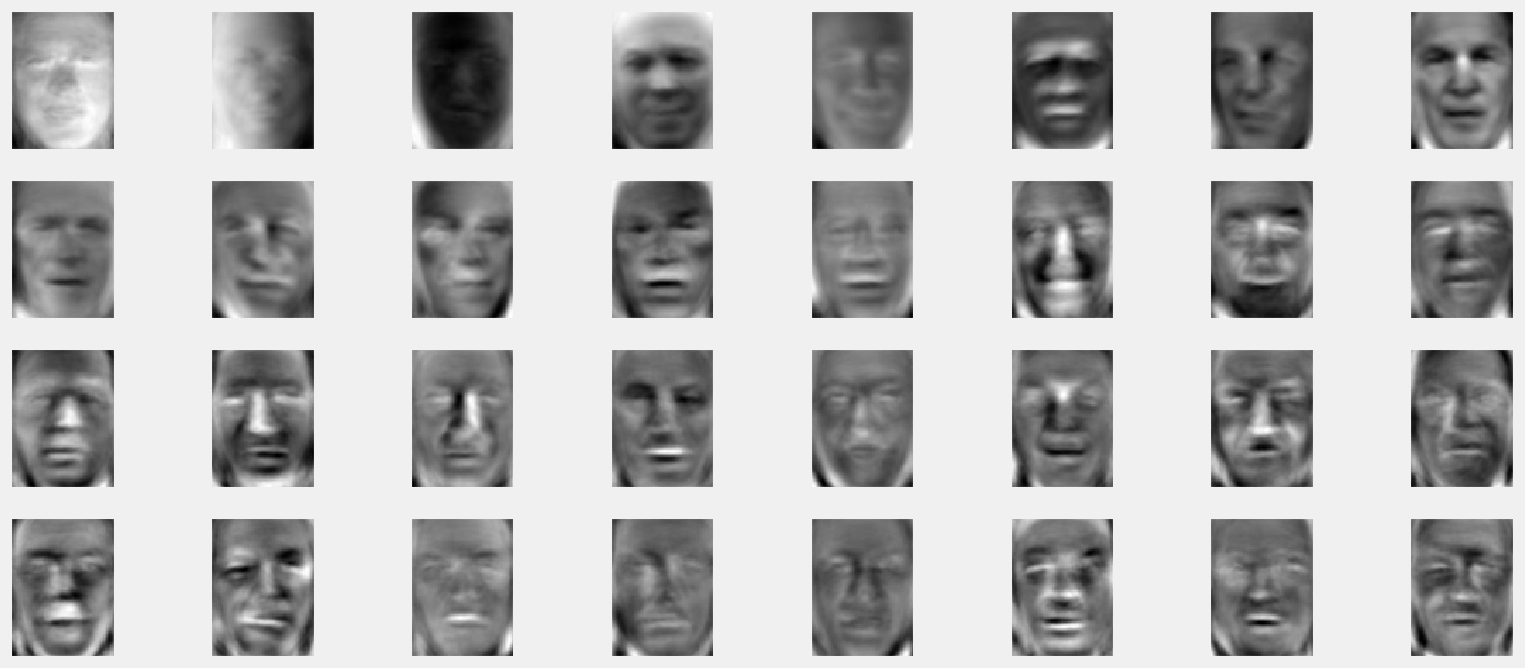

In [67]:
fig, axes = plt.subplots(4, 8, figsize=(18, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i].reshape(100, 75), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

Rappresentazione di una specifica eigenface

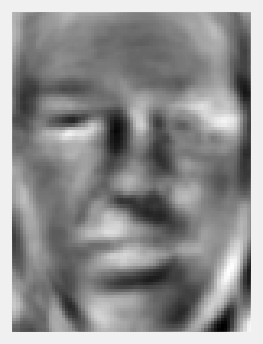

In [69]:
j = 34
plt.figure(figsize=(4,4))
plt.imshow(eigenfaces[j], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

Visualizzazione dei valori singolari (autovalori) ottenuti dalla PCA.

- `plt.figure(figsize=(16,8))`: crea una nuova figura, fornendo uno spazio ampio per la visualizzazione del grafico.
- `plt.plot(pca.singular_values_, marker='o', markersize=4, markerfacecolor=colors[1], markeredgecolor=colors[1])`: traccia i valori singolari della PCA come una linea, utilizzando un cerchio ('o') come marker per ogni punto. La dimensione e il colore dei marker sono personalizzati tramite `markersize`, `markerfacecolor` e `markeredgecolor`, dove `colors[1]` si riferisce alla palette di colori definita in precedenza.
- `plt.xlabel('number of component')` e `plt.ylabel('singular value')`: aggiungono rispettivamente le etichette agli assi x e y, rendendo chiaro che l’asse x rappresenta il numero del componente e l’asse y il valore singolare corrispondente.
- `plt.show()`: visualizza la figura appena creata. In un notebook Jupyter, questa chiamata è spesso opzionale, ma garantisce che il grafico venga mostrato.

Questo tipo di grafico è utile per valutare l’importanza relativa dei diversi componenti principali: un rapido calo nei valori singolari indica che pochi componenti spiegano la maggior parte della varianza nei dati.

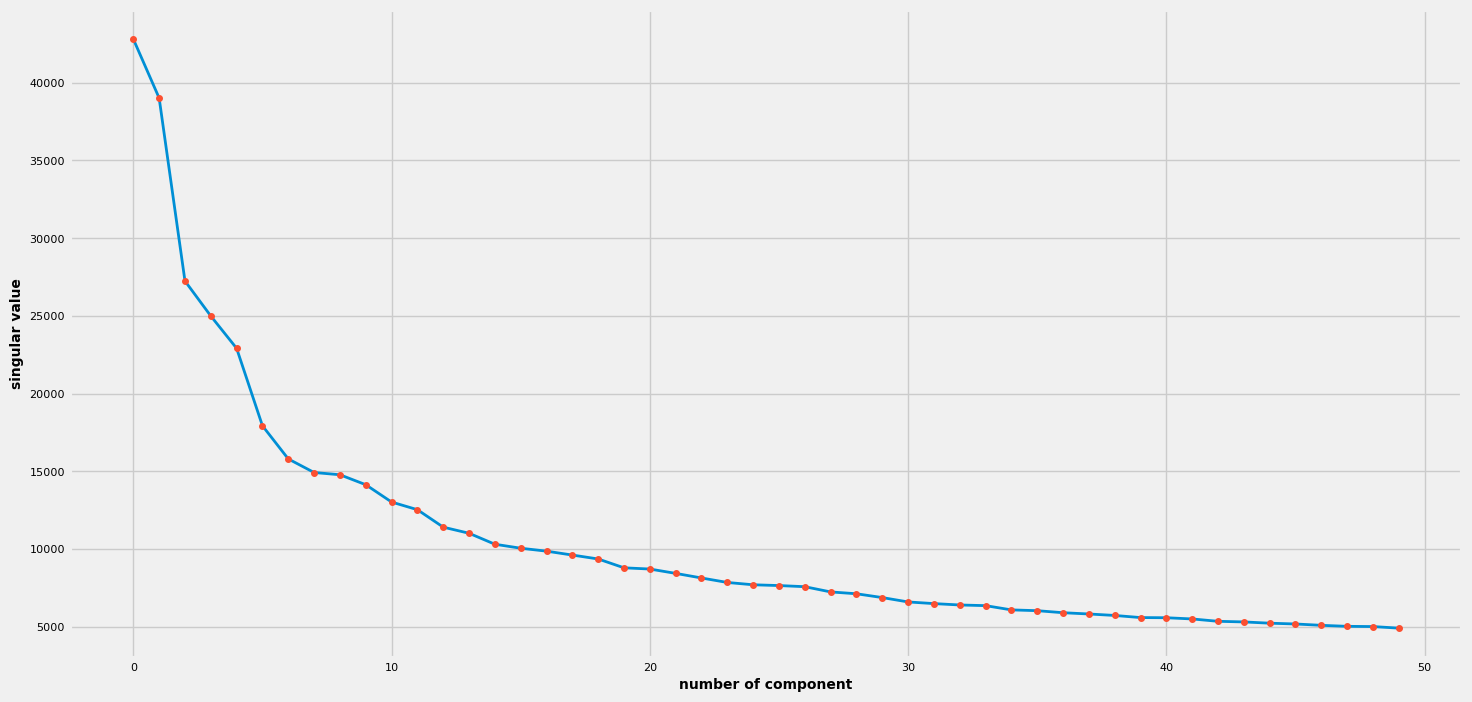

In [70]:
plt.figure(figsize=(16,8))
plt.plot(pca.singular_values_, marker='o', markersize=4, markerfacecolor=colors[1], markeredgecolor=colors[1])
plt.xlabel('number of component')
plt.ylabel('singular value')
plt.show()

Creazione di un grafico che mostra la varianza cumulativa spiegata dai componenti principali calcolate dalla PCA.

- `plt.figure(figsize=(16,8))`: crea una nuova figura con dimensioni 16x8 pollici, utile per avere un grafico più leggibile, soprattutto quando ci sono molti dati.
- `plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', markersize=4, markerfacecolor=colors[1], markeredgecolor=colors[1])`: traccia la somma cumulativa della varianza spiegata da ciascun componente principale. Questo permette di vedere rapidamente quanti componenti sono necessari per spiegare una certa percentuale della varianza totale. I marker ('o') rendono più visibili i singoli punti sul grafico, e i colori sono personalizzati tramite la variabile `colors`.
- `plt.xlabel('number of components')` e `plt.ylabel('cumulative explained variance')`: aggiungono le etichette agli assi, rendendo chiaro che l’asse x rappresenta il numero di componenti principali e l’asse y la varianza cumulativa spiegata.
- `plt.show()`: visualizza il grafico. In un notebook Jupyter, questa chiamata è spesso opzionale, ma garantisce che il grafico venga effettivamente mostrato.

Questo tipo di grafico è molto utile per decidere quanti componenti principali mantenere in un’analisi PCA, scegliendo ad esempio il punto in cui la curva si appiattisce (elbow method).

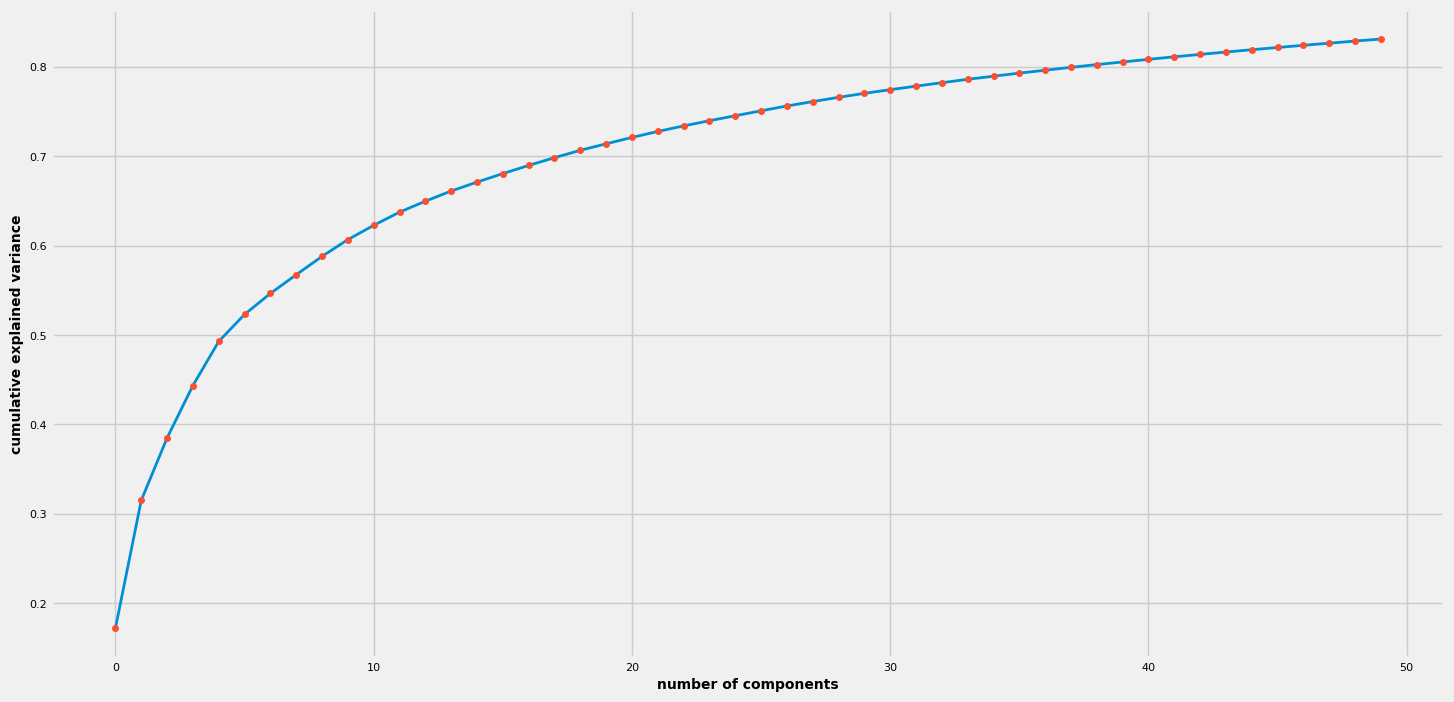

In [71]:
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', markersize=4, markerfacecolor=colors[1], markeredgecolor=colors[1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Uso dei metodi `transform` e `inverse_transform` di un oggetto PCA (Principal Component Analysis) per ridurre la dimensionalità dei dati e poi ricostruirli nello spazio originale.

1. **Riduzione della dimensionalità:**  
   Le righe  
   ```python
   X_train_pca = pca.transform(X_train)
   X_test_pca = pca.transform(X_test)
   ```  
   applicano la trasformazione PCA ai dati di addestramento (`X_train`) e di test (`X_test`). I dati originali vengono proiettati in uno spazio a dimensionalità ridotta, mantenendo solo le componenti principali, che dovrebbero spiegare la maggior parte della varianza nei dati. Il risultato (`X_train_pca` e `X_test_pca`) contiene quindi una rappresentazione compressa dei dati originali.

2. **Ricostruzione nello spazio originale:**  
   La riga  
   ```python
   X_train_rec = pca.inverse_transform(X_train_pca)
   ```  
   prende i dati compressi (`X_train_pca`) e li trasforma nuovamente nello spazio delle caratteristiche originali. Questo processo cerca di ricostruire i dati originali a partire dalla loro rappresentazione ridotta. Tuttavia, poiché alcune informazioni vengono perse durante la riduzione della dimensionalità, la ricostruzione (`X_train_rec`) sarà solo un'approssimazione dei dati originali (`X_train`).

Questa sequenza di operazioni è tipica nell'analisi delle immagini (come nel caso degli eigenfaces), dove si vuole ridurre la complessità dei dati mantenendo le informazioni più rilevanti, e poi valutare quanto bene sia possibile ricostruire le immagini originali a partire dalle sole componenti principali.

In [72]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_rec = pca.inverse_transform(X_train_pca)

Visualizzazione di una galleria di immagini. La funzione prende come input un array di immagini (`X_train`), l'altezza (`h`) e la larghezza (`w`) di ciascuna immagine, e specifica che la griglia dovrà avere 6 righe e 8 colonne. Questo significa che verranno mostrate fino a 48 immagini (6 x 8) prese da `X_train`, ognuna ricostruita dalla sua versione "flattened" (monodimensionale) alla forma originale (`h` x `w`). Le immagini saranno visualizzate in scala di grigi e senza titoli.

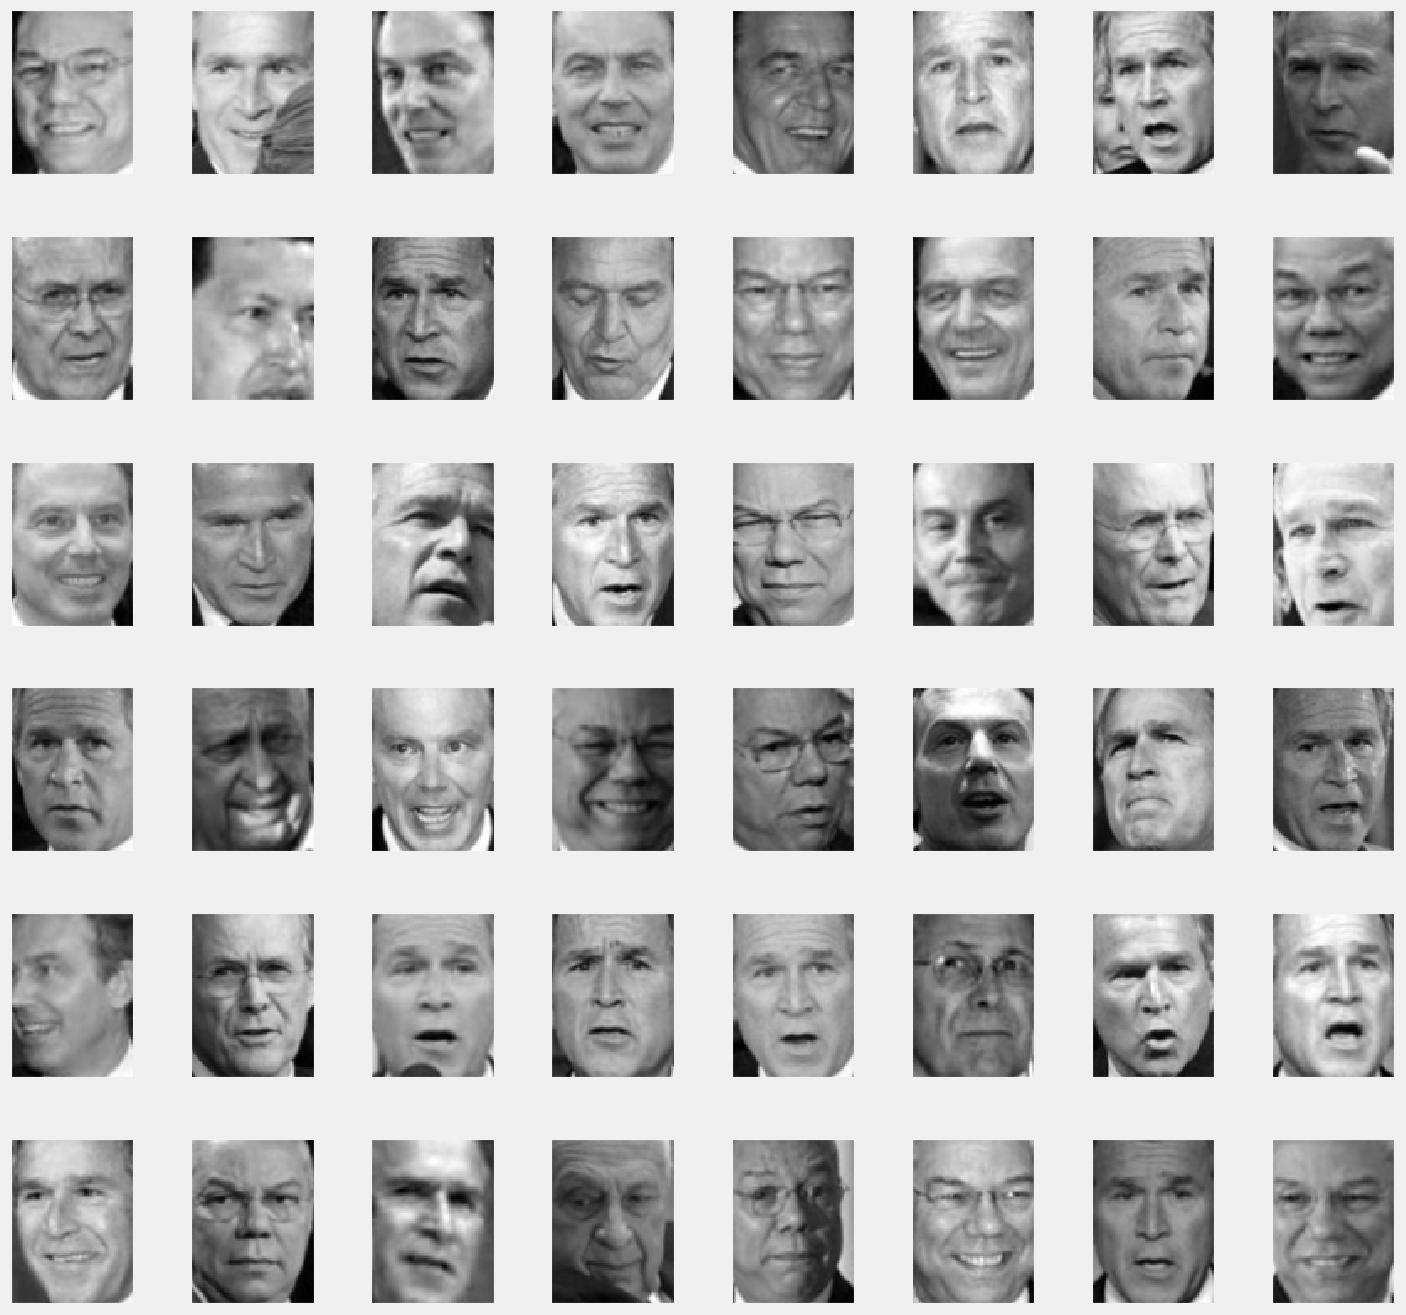

In [73]:
plot_gallery(X_train, h, w, n_row=6, n_col=8)

Visualizzazione di una galleria delle ricostruzioni delle stesse immagini a partire dalla loro rappresentazione attraverso le sole componenti (eigenfaces) principali.

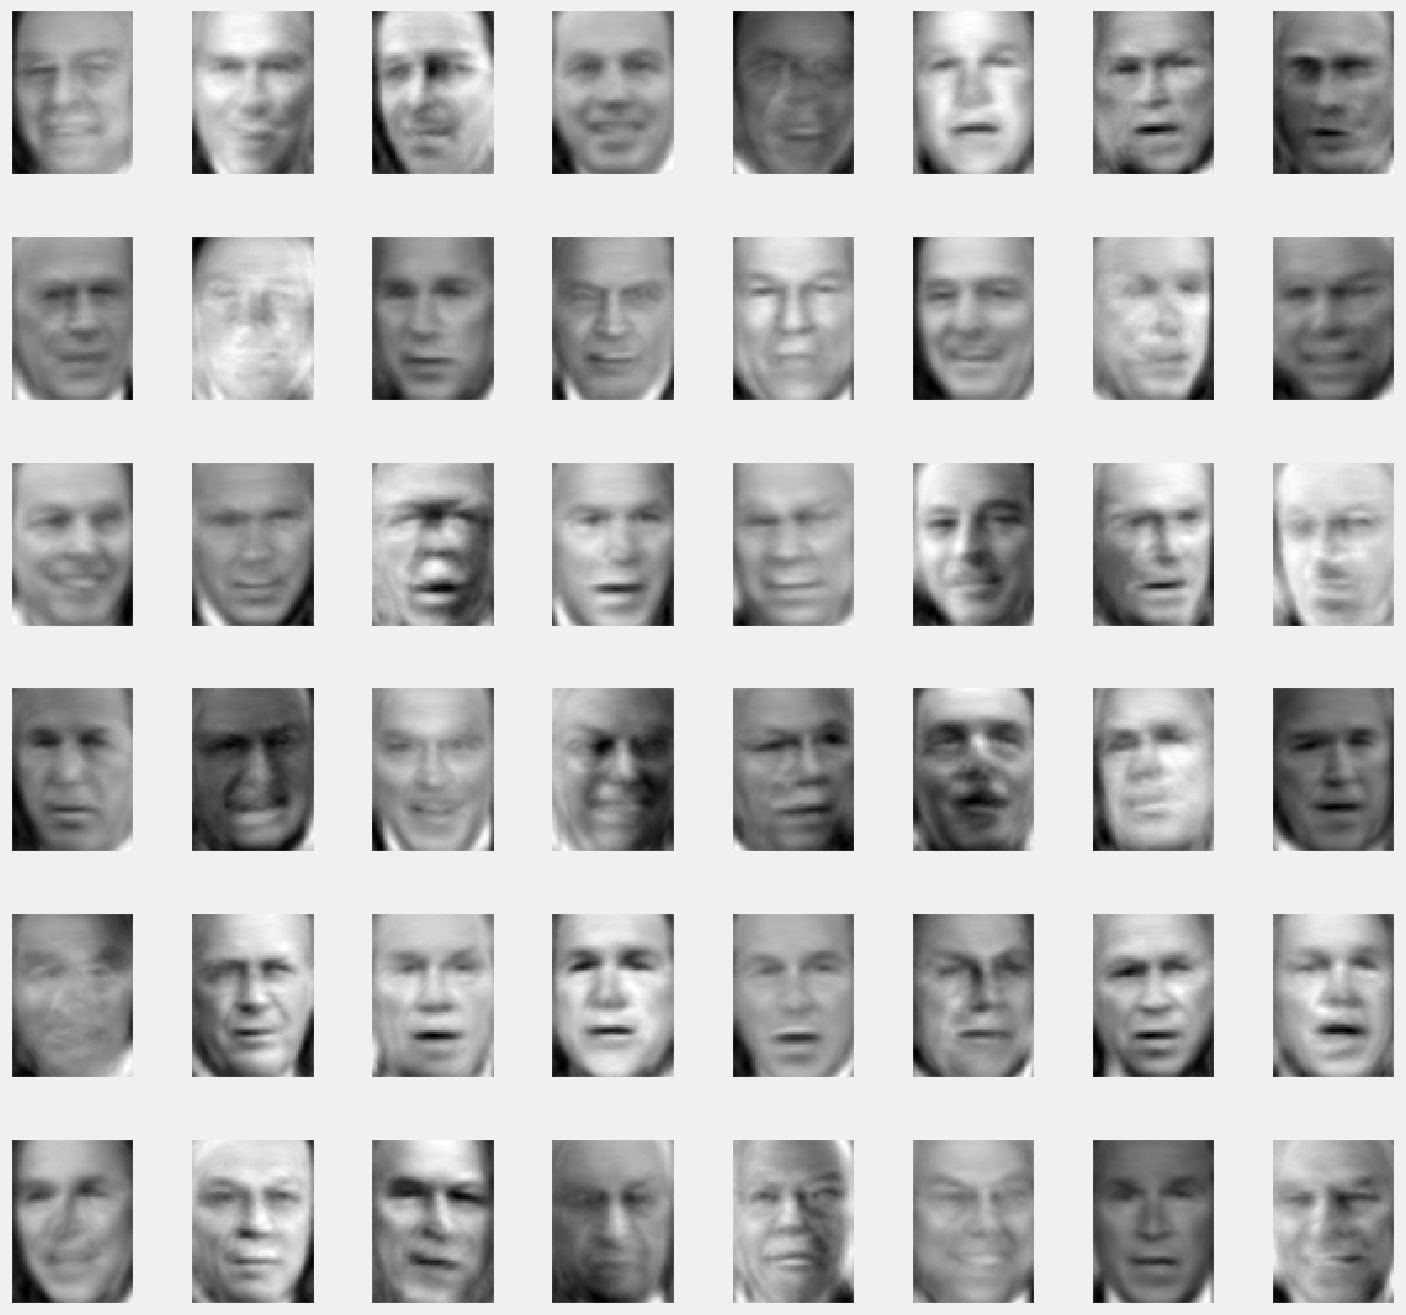

In [74]:
plot_gallery(X_train_rec, h, w, n_row=6, n_col=8)

Ricostruzione dell'immagine di un volto. 

Per prima cosa, viene selezionato l'indice dell'immagine da ricostruire (`k`) utilizzando il numero di componenti principali (`ncomponents`) già specificato. Si crea quindi un oggetto PCA, che viene adattato (`fit`) sui dati di training (`X_train`). L'opzione `whiten=True` normalizza le componenti principali.

L'immagine selezionata viene proiettata nello spazio delle componenti principali tramite `pca1.transform`, ottenendo così una rappresentazione compatta (feature extraction). Successivamente, questa rappresentazione viene riconvertita nello spazio originale con `pca1.inverse_transform`, ottenendo una versione ricostruita dell'immagine originale ma usando solo le informazioni contenute nelle prime 100 componenti principali.

Infine, il codice visualizza affiancate sia l'immagine originale sia quella ricostruita, permettendo di confrontare quanto dettaglio viene mantenuto usando solo un sottoinsieme delle componenti principali. Questo processo evidenzia come la PCA riesca a comprimere e poi ricostruire i dati, mostrando anche eventuali perdite di informazione dovute alla riduzione della dimensionalità.

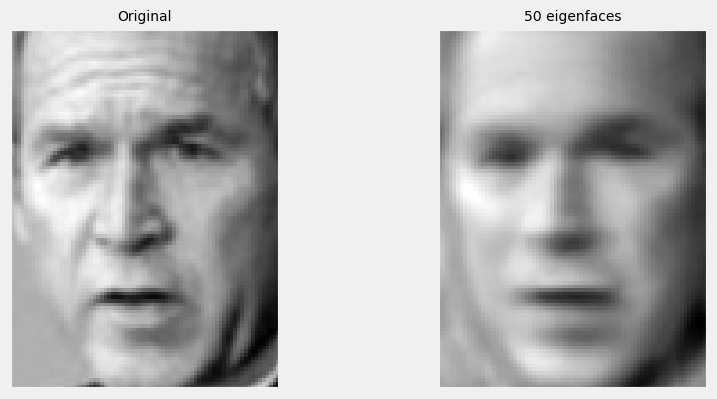

In [75]:
# Seleziona l'indice dell'immagine da ricostruire
k = 380

# Crea e adatta la PCA sui dati di training con ncomponents componenti principali
pca1 = PCA(n_components=ncomponents, svd_solver='randomized', whiten=True).fit(X_train)

# Proietta l'immagine selezionata nello spazio delle componenti principali
f = pca1.transform(X_train[k, :].reshape(1, -1))
# Ricostruisce l'immagine originale dallo spazio delle componenti principali
f1 = pca1.inverse_transform(f)

# Crea una figura per mostrare l'originale e la ricostruzione
plt.figure(figsize=(8, 4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

# Mostra l'immagine originale
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(X_train[k, :].reshape((h, w)), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

# Mostra l'immagine ricostruita usando ncomponents eigenfaces
plt.subplot(1, 2, 2)
plt.title('{0:d} eigenfaces'.format(ncomponents))
plt.imshow(f1.reshape(h, w), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

# Visualizza entrambe le immagini
plt.show()

Uso della ricerca a griglia (GridSearchCV) per ottimizzare i parametri di un classificatore SVM (Support Vector Machine) con kernel RBF (Radial Basis Function). 

Il dizionario `param_grid` definisce i valori da testare per due iperparametri fondamentali dell'SVM:  
- `'C'`: il parametro di regolarizzazione, che controlla il compromesso tra una classificazione accurata dei dati di addestramento e la massimizzazione del margine tra le classi.  
- `'gamma'`: determina l'influenza di un singolo esempio di addestramento; valori bassi significano che il modello considera punti lontani, mentre valori alti si concentrano su punti vicini.

`GridSearchCV` esegue una ricerca esaustiva su tutte le combinazioni possibili dei valori specificati in `param_grid`, utilizzando una validazione incrociata a 7 fold (`cv=7`). Il parametro `scoring='accuracy'` indica che la metrica da ottimizzare è l'accuratezza.

Infine, il metodo `fit` addestra il modello sui dati ridotti tramite PCA (`X_train_pca`) e sulle etichette (`y_train`). Al termine, `clf` conterrà il modello migliore trovato, insieme ai parametri ottimali.

In [76]:
# Definisce la griglia dei parametri da testare per la SVM:
# - 'C': valori del parametro di regolarizzazione
# - 'gamma': valori del parametro del kernel RBF
param_grid = {'C': [77, 77.5, 78], 'gamma': [0.0017, 0.0018, 0.0019] }

# Crea un oggetto GridSearchCV per cercare la combinazione ottimale di parametri
# - SVC(kernel='rbf'): classificatore SVM con kernel RBF
# - param_grid: griglia dei parametri da testare
# - cv=7: validazione incrociata a 7 fold
# - scoring='accuracy': ottimizza l'accuratezza
clf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=7, scoring='accuracy')

# Esegue la ricerca dei parametri ottimali addestrando il modello sui dati ridotti tramite PCA
clf = clf.fit(X_train_pca, y_train)

Stampa dei migliori valori trovati per i parametri. 

L'attributo `best_params_` contiene un dizionario con i valori migliori trovati per ciascun iperparametro (in questo caso, `C` e `gamma`). L'attributo `best_score_` rappresenta la migliore accuratezza ottenuta durante la validazione incrociata.

In [77]:
best_params = clf.best_params_
best_score = clf.best_score_
print(f"C = {best_params['C']:5.3f}, gamma = {best_params['gamma']:7.5f}, accuracy = {best_score:5.3f}")

C = 77.000, gamma = 0.00170, accuracy = 0.790


Valutazione delle prestazioni del classificatore (`clf`) sui dati di training dopo una trasformazione PCA. La variabile `y_pred_train` contiene le etichette predette dal classificatore per i dati di addestramento (`X_train_pca`). Successivamente, vengono stampati i nomi delle classi (`target_names`), la matrice di confusione e l'accuratezza del modello.

La funzione `confusion_matrix` restituisce la matrice di confusione, che mostra come le predizioni del modello si confrontano con le etichette reali (`y_train`), fornendo una panoramica dettagliata degli errori commessi per ciascuna classe. Il parametro `labels=range(n_classes)` garantisce che la matrice abbia una dimensione coerente con il numero totale di classi, anche se alcune classi potrebbero non essere presenti nei dati.

Infine, la funzione `accuracy_score` calcola la frazione di campioni classificati correttamente, restituendo un valore compreso tra 0 e 1.

In [78]:
y_pred_train = clf.predict(X_train_pca)

print(target_names)
print(confusion_matrix(y_train, y_pred_train, labels=range(n_classes)))
print('accuracy: {0:5.3f}'.format(accuracy_score(y_train, y_pred_train, normalize=True)))

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
[[ 59   0   0   0   0   0   0]
 [  0 177   0   2   0   0   0]
 [  0   0  84   1   0   0   0]
 [  0   2   0 391   0   0   0]
 [  0   0   0   1  83   1   0]
 [  0   0   0   0   0  55   0]
 [  0   0   0   2   1   0 107]]
accuracy: 0.990


Medesima valutazione in riferimento ai dati di test

In [79]:
y_pred_test = clf.predict(X_test_pca)

print(target_names)
print(confusion_matrix(y_test, y_pred_test, labels=range(n_classes)))
print('accuracy: {0:5.3f}'.format(accuracy_score(y_test, y_pred_test, normalize=True)))

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
[[ 13   2   1   0   1   0   1]
 [  3  48   0   4   0   1   1]
 [  2   1  24   6   2   0   1]
 [  2   4   1 122   5   2   1]
 [  0   0   3   0  18   1   2]
 [  0   1   0   3   0  12   0]
 [  0   1   0   4   2   0  27]]
accuracy: 0.820


Funzione utilizzata per generare una stringa descrittiva che mostra sia la previsione del modello che la classe reale (vera) per un determinato esempio in un problema di classificazione.

La funzione accetta quattro parametri:

- `y_pred`: un array contenente le etichette previste dal modello per ciascun esempio.
- `y_test`: un array contenente le etichette reali (vere) per ciascun esempio.
- `target_names`: una lista di nomi associati alle etichette numeriche (ad esempio, i nomi delle persone).
- `i`: l'indice dell'esempio che si vuole descrivere.

All'interno della funzione, si recupera il nome associato sia alla previsione che al valore reale usando l'indice `i`. La funzione `rsplit(' ', 1)[-1]` viene utilizzata per estrarre solo l'ultimo elemento del nome (ad esempio, il cognome), separando la stringa dall'ultimo spazio. Infine, la funzione restituisce una stringa formattata su due righe: la prima mostra il valore previsto (`predicted`), la seconda quello reale (`true`). Questo è utile per visualizzare rapidamente, ad esempio in una griglia di immagini, se il modello ha riconosciuto correttamente una persona. 


In [81]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return f'predicted: {pred_name}\ntrue:      {true_name}'

Inizialmente, creazione di una lista di titoli (`prediction_titles`) che verranno utilizzati per etichettare ciascuna immagine nella galleria. Questo viene fatto tramite una list comprehension che cicla su tutti gli indici delle predizioni (`y_pred_test`). Per ogni indice, la funzione `title` genera una stringa che mostra sia il nome previsto che quello reale della persona rappresentata nell’immagine, estraendo il cognome da `target_names` tramite slicing della stringa.

Successivamente, la funzione `plot_gallery` viene chiamata per visualizzare le immagini di test (`X_test`) in una griglia, usando le dimensioni specificate da `h` e `w`. I titoli generati vengono passati come parametro, così che ogni immagine mostri sopra di sé il risultato della predizione e il valore reale.

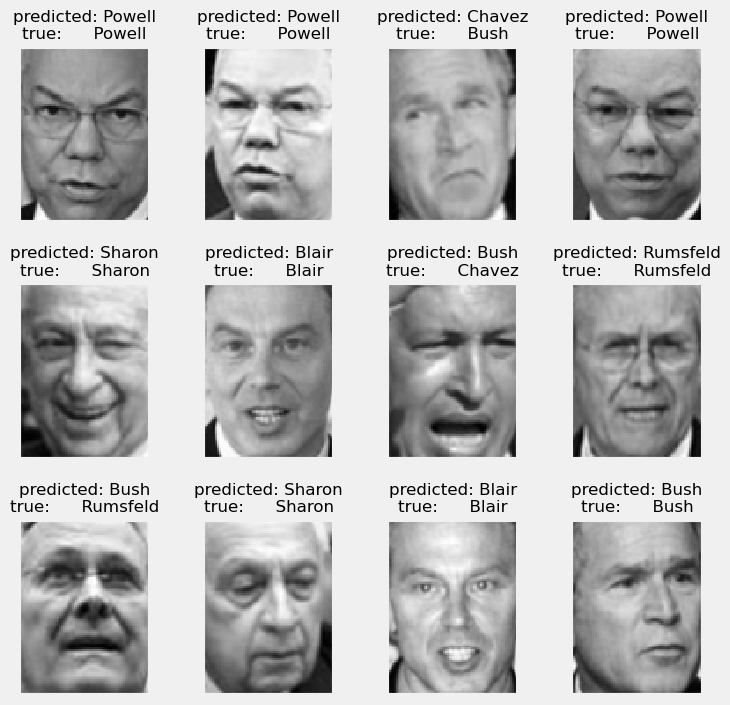

In [82]:
prediction_titles = [title(y_pred_test, y_test, target_names, i) for i in range(y_pred_test.shape[0])]

plot_gallery(X_test, h, w, titles=prediction_titles)